## Name : Rohan Singh Rajput
### Assignment  : Kaggle House Price Prediction 
Description : This is a Kaggle Competition for the House Price Prediction. This is not a priced Competition we are using to enhance our data science skiils 
 
 
## Rules:
 
	
## TODO:
	
	
	


### DEVELOPMENT TRAIL
 ---------------------------------------------------------------------------------
 Date		Person						Notes
 2017-05-10 Rohan Rajput			  	Initial Creation of Notebook for the Data Analytics 

 

In [1]:
# Import libraries 

# Pandas 

import pandas as pd
from pandas import Series,DataFrame 


# Numpy and Matplotlib
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 
sns.set_style('whitegrid')
%matplotlib inline

# Machine Learning 
from sklearn import preprocessing

In [2]:
# Get Data in Dataframe 
house_price_df = pd.read_csv('./input/train.csv')
test_house_price_df = pd.read_csv('./input/test.csv')

In [3]:
# Preview of Data 
house_price_df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
# Preview of Data 
test_house_price_df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [5]:
# Information 
print('-----------------Train Data----------------------->')
house_price_df.info()
print('-----------------Test Data----------------------->')
test_house_price_df.info()

-----------------Train Data----------------------->
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl     

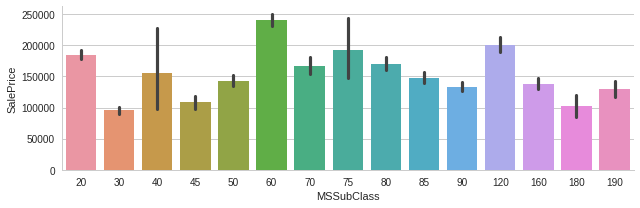

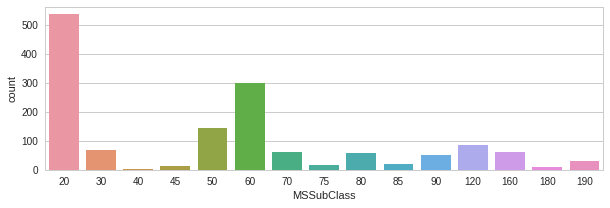

In [6]:
sns.factorplot('MSSubClass', 'SalePrice', data=house_price_df,kind='bar',size=3,aspect=3)
fig, (axis1) = plt.subplots(1,1,figsize=(10,3))
sns.countplot(x='MSSubClass', data=house_price_df, ax=axis1)

In [7]:
house_price_df['MSSubClass'].value_counts()
#house_price_df['SalePrice'].describe()
#sns.countplot(x='SalePrice', hue="MSSubClass", data=house_price_df, order=[1,0], ax=axis2)

20     536
60     299
50     144
120     87
30      69
160     63
70      60
80      58
90      52
190     30
85      20
75      16
45      12
180     10
40       4
Name: MSSubClass, dtype: int64

RL         1151
RM          218
FV           65
RH           16
C (all)      10
Name: MSZoning, dtype: int64

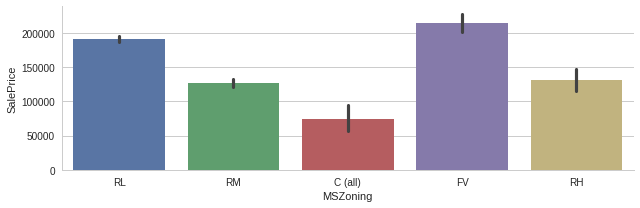

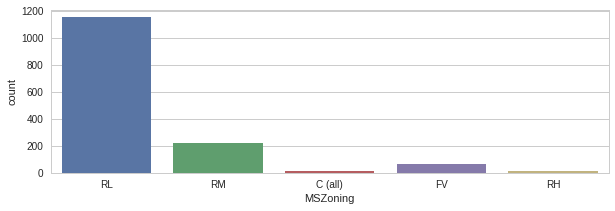

In [8]:
sns.factorplot('MSZoning', 'SalePrice', data=house_price_df,kind='bar',size=3,aspect=3)
fig, (axis1) = plt.subplots(1,1,figsize=(10,3))
sns.countplot(x='MSZoning', data=house_price_df, ax=axis1)
house_price_df['MSZoning'].value_counts()

In [12]:
house_price_df['SalePrice'].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

Skew is: 1.88287575977


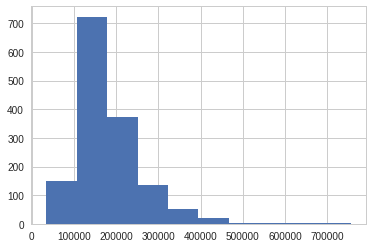

Skew is: 0.121335062205


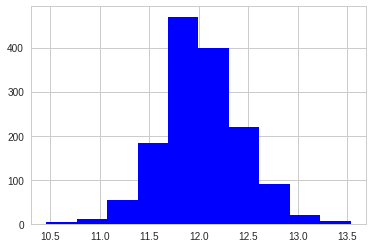

In [13]:



# Determining the Skewness of data 
print ("Skew is:", house_price_df.SalePrice.skew())

plt.hist(house_price_df.SalePrice)
plt.show()

# After log transformation of the data it looks much more center aligned
new = np.log(house_price_df.SalePrice)
print ("Skew is:", new.skew())
plt.hist(new, color='blue')
plt.show()


In [14]:
# It is important to find out the numeric feature of the data so we will analyse it by using numpy library
numerical_features = house_price_df.select_dtypes(include=[np.number])
numerical_features.dtypes

Id                 int64
MSSubClass         int64
LotFrontage      float64
LotArea            int64
OverallQual        int64
OverallCond        int64
YearBuilt          int64
YearRemodAdd       int64
MasVnrArea       float64
BsmtFinSF1         int64
BsmtFinSF2         int64
BsmtUnfSF          int64
TotalBsmtSF        int64
1stFlrSF           int64
2ndFlrSF           int64
LowQualFinSF       int64
GrLivArea          int64
BsmtFullBath       int64
BsmtHalfBath       int64
FullBath           int64
HalfBath           int64
BedroomAbvGr       int64
KitchenAbvGr       int64
TotRmsAbvGrd       int64
Fireplaces         int64
GarageYrBlt      float64
GarageCars         int64
GarageArea         int64
WoodDeckSF         int64
OpenPorchSF        int64
EnclosedPorch      int64
3SsnPorch          int64
ScreenPorch        int64
PoolArea           int64
MiscVal            int64
MoSold             int64
YrSold             int64
SalePrice          int64
dtype: object

In [16]:
# Then we will try to find the corretation between the feature and target
corr = numerical_features.corr()
print (corr['SalePrice'].sort_values(ascending=False)[:5], '\n')
print (corr['SalePrice'].sort_values(ascending=False)[-5:])


SalePrice      1.000000
OverallQual    0.790982
GrLivArea      0.708624
GarageCars     0.640409
GarageArea     0.623431
Name: SalePrice, dtype: float64 

YrSold          -0.028923
OverallCond     -0.077856
MSSubClass      -0.084284
EnclosedPorch   -0.128578
KitchenAbvGr    -0.135907
Name: SalePrice, dtype: float64


In [17]:
#This gives us most correlated five features from the data 
#We will analyse them further to get some more intution
house_price_df.OverallQual.unique()

array([ 7,  6,  8,  5,  9,  4, 10,  3,  1,  2])